# Online Movie Review Analysis
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be ratedkets.**

## Understanding the Background and Data


**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Exploratory Analysis 

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Run the cell below to read in the fandango_scrape.csv file**

In [2]:
fandago= pd.read_csv("C:/SINGH/AIMlWork/AIMLwork/OnlineMovieReviewAnalysis/fandango_scrape.csv")


In [3]:
fandago.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandago.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [5]:
fandago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
allsitescore= pd.read_csv("C:/SINGH/AIMlWork/AIMLwork/OnlineMovieReviewAnalysis/all_sites_scores.csv")

In [7]:
allsitescore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [8]:
allsitescore.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [9]:
allsitescore.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


**TASK: Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

<Axes: xlabel='RATING', ylabel='VOTES'>

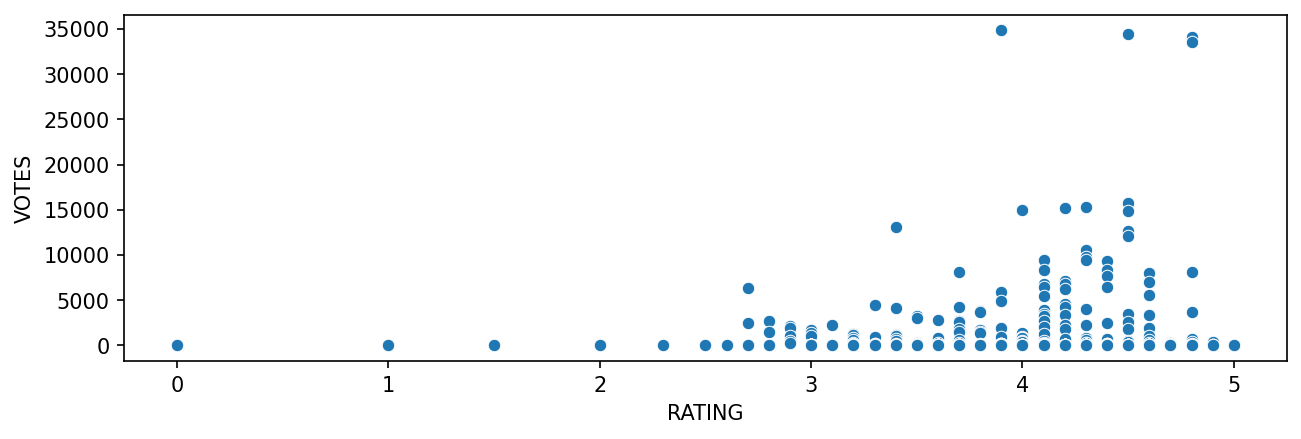

In [10]:
plt.figure(figsize=(10,3),dpi=150)
sns.scatterplot(data=fandago,x='RATING',y='VOTES')

In [11]:
fandago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [12]:
fandago.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [13]:
##fandago['year']=fandago['FILM'].apply(lambda title:title.split('(')[-1])

In [14]:
fandago['YEAR'] = fandago['FILM'].apply(lambda title:title.split('(')[-1])

In [15]:
fandago['year'] = fandago['YEAR'].apply(lambda title:title.split(')')[0])

In [16]:
fandago.head()

,FILM,STARS,RATING,VOTES,YEAR,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),2015
1,Jurassic World (2015),4.5,4.5,34390,2015),2015
2,American Sniper (2015),5.0,4.8,34085,2015),2015
3,Furious 7 (2015),5.0,4.8,33538,2015),2015
4,Inside Out (2015),4.5,4.5,15749,2015),2015


In [17]:
fandago=fandago.drop('YEAR' ,axis=1)

In [18]:
fandago

,FILM,STARS,RATING,VOTES,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [19]:
fandago['year'].value_counts()

year
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

<Axes: xlabel='year', ylabel='count'>

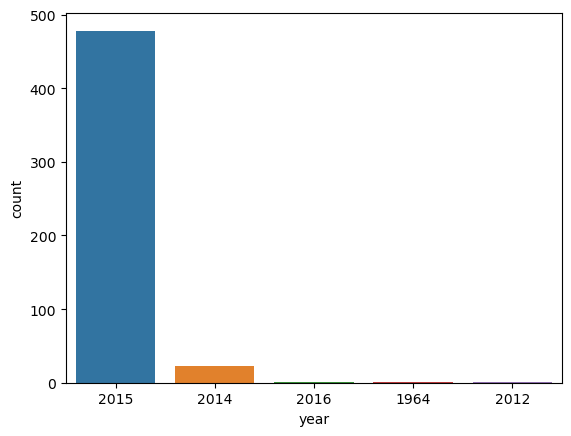

In [20]:
sns.countplot(data=fandago ,x='year')

**TASK: What are the 10 movies with the highest number of votes?**

In [21]:
fandago.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [22]:
no_votes=fandago['VOTES']==0 

In [23]:
no_votes.sum()

69

**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [24]:
fan_reviewed = fandago[fandago['VOTES']>0]

In [25]:
fan_reviewed

,FILM,STARS,RATING,VOTES,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

C:\Users\Suvarna Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suvarna Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


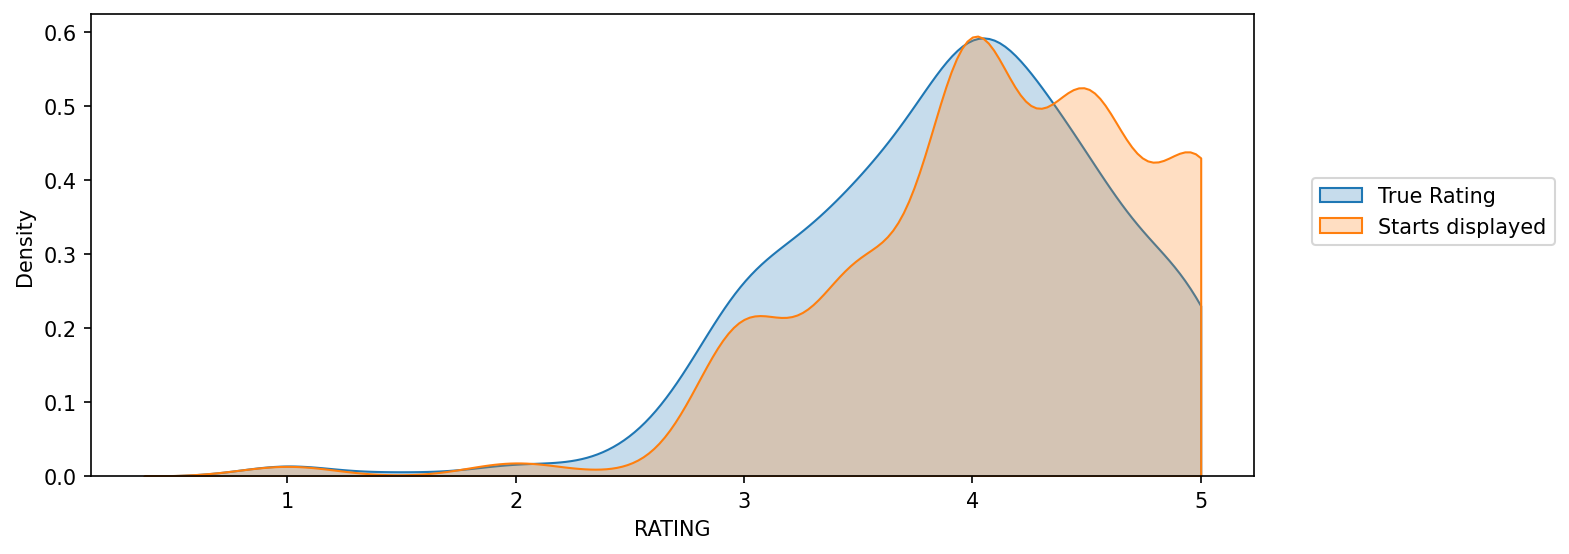

In [26]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed ,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed ,x='STARS',clip=[0,5],fill=True,label='Starts displayed')
plt.legend(loc=(1.05,0.5))

**TASK: Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [27]:
fan_reviewed=fan_reviewed.drop('STARS_DIFF',axis=1)

KeyError: "['STARS_DIFF'] not found in axis"

In [ ]:
fan_reviewed.describe()

In [ ]:
fan_reviewed["STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING'] 

In [ ]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

In [28]:
fan_reviewed

,FILM,STARS,RATING,VOTES,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**TASK: Create a count plot to display the number of times a certain difference occurs:

In [ ]:
sns.countplot(data=fan_reviewed ,x='STARS_DIFF')

**TASK: We can see from the plot that one movie was displaying more than  0.4 star difference than its true rating! What movie had this close to 1 star differential?**

In [ ]:
fan_reviewed[fan_reviewed['STARS_DIFF'] > 0.4]

**TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]


## Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.



In [ ]:
allsitescore.describe()

(0.0, 100.0)

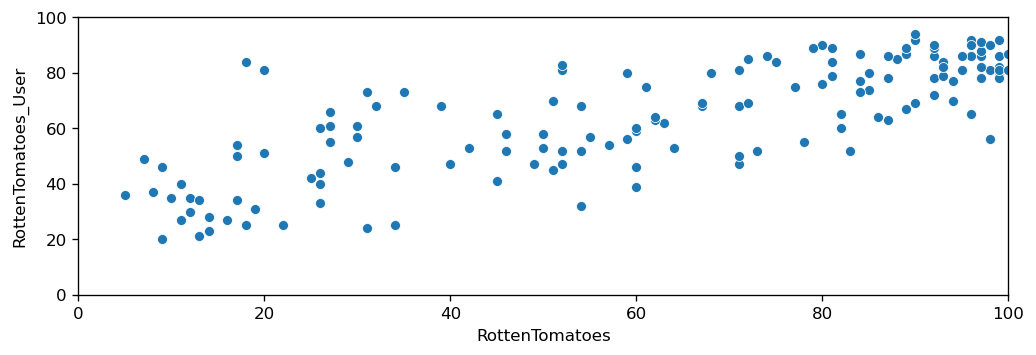

In [29]:
plt.figure(figsize=(10,3),dpi=120)
sns.scatterplot(data=allsitescore,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [30]:
allsitescore["RottenTomatoes_Diff"] = allsitescore['RottenTomatoes'] - allsitescore['RottenTomatoes_User'] 

In [31]:
allsitescore["RottenTomatoes_Diff"]=allsitescore["RottenTomatoes_Diff"].round(2)

Let us plot countplot to see how many times we have differnce in score for RottenTomatoes

<Axes: xlabel='RottenTomatoes_Diff', ylabel='count'>

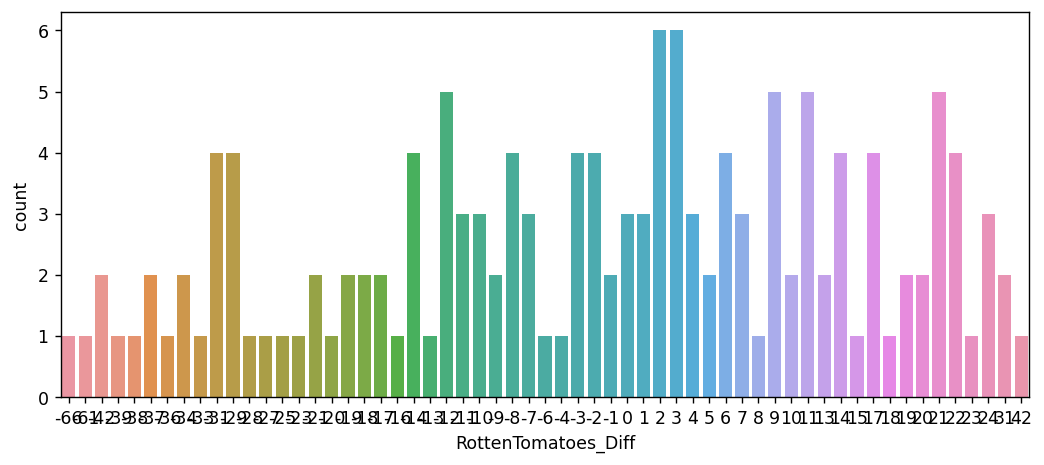

In [32]:
plt.figure(figsize=(10,4),dpi=125)
sns.countplot(data=allsitescore,x='RottenTomatoes_Diff')

C:\Users\Suvarna Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


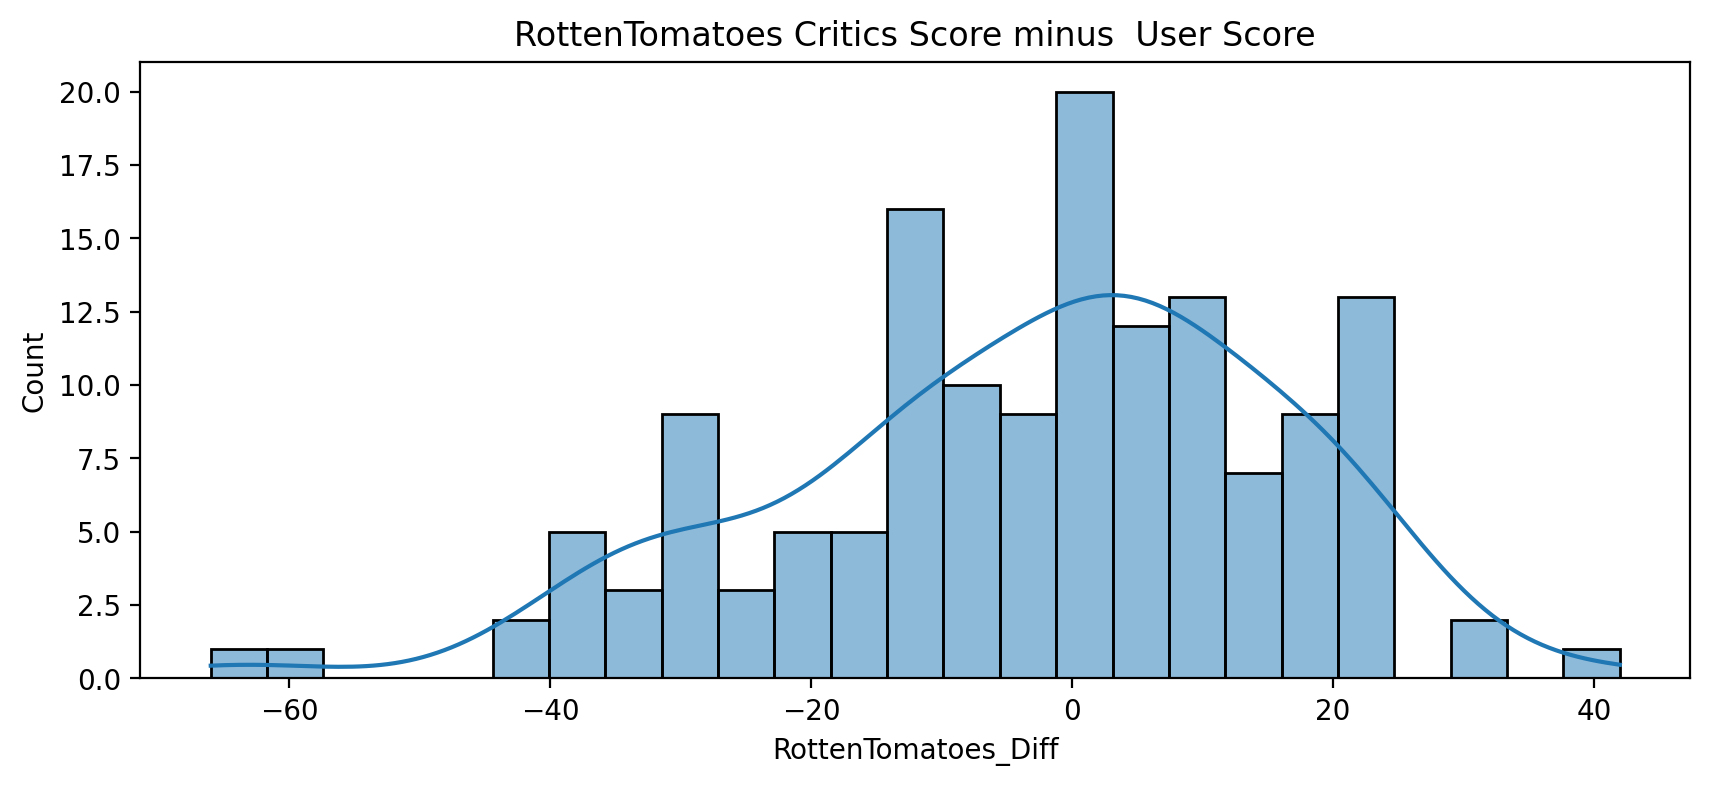

In [33]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=allsitescore,x='RottenTomatoes_Diff',kde=True,bins=25)
plt.title("RottenTomatoes Critics Score minus  User Score");

C:\Users\Suvarna Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


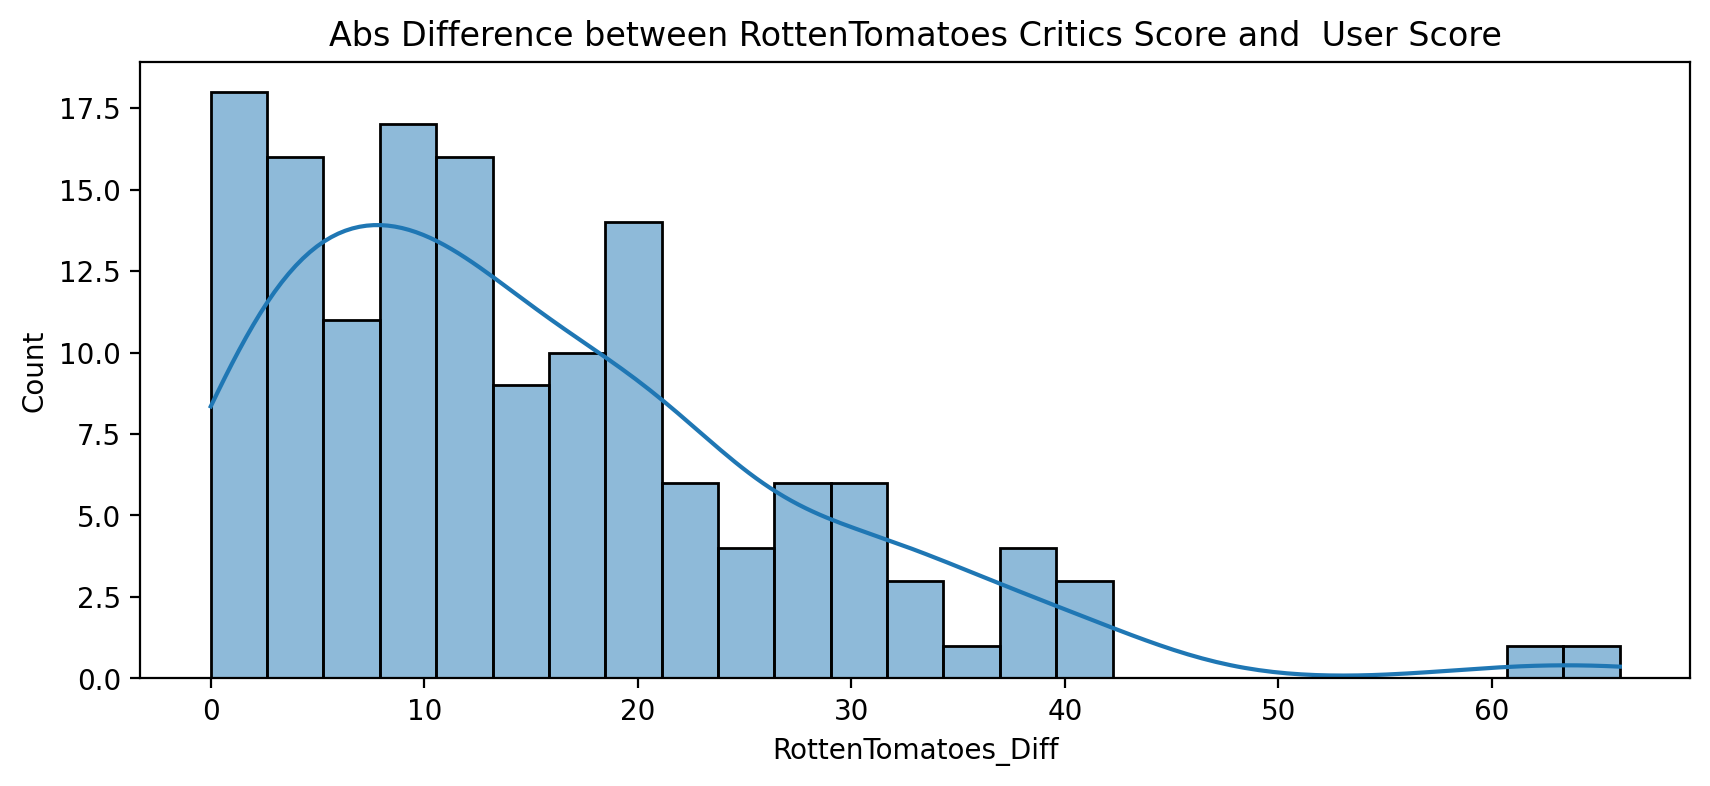

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=allsitescore['RottenTomatoes_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RottenTomatoes Critics Score and  User Score");

**TASK: What are the top 10  movies users rated higher than critics on average:**

In [40]:
allsitescore.nsmallest(10,'RottenTomatoes_Diff')[['FILM','RottenTomatoes','RottenTomatoes_User']]


,FILM,RottenTomatoes,RottenTomatoes_User
3,Do You Believe? (2015),18,84
85,Little Boy (2015),20,81
105,Hitman: Agent 47 (2015),7,49
134,The Longest Ride (2015),31,73
125,The Wedding Ringer (2015),27,66
132,Max (2015),35,73
15,Taken 3 (2015),9,46
19,Pixels (2015),17,54
51,Entourage (2015),32,68
47,Annie (2014),27,61


**TASK: What are the top 10  movies Critics  rated higher than Users on average:**

In [41]:
allsitescore.nlargest(10,'RottenTomatoes_Diff')[['FILM','RottenTomatoes','RottenTomatoes_User']]

,FILM,RottenTomatoes,RottenTomatoes_User
69,Mr. Turner (2014),98,56
112,It Follows (2015),96,65
115,While We're Young (2015),83,52
37,Welcome to Me (2015),71,47
40,I'll See You In My Dreams (2015),94,70
145,"Kumiko, The Treasure Hunter (2015)",87,63
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55
7,Top Five (2014),86,64
11,Black Sea (2015),82,60
87,Maggie (2015),54,32


##Let us do similar exercise for Metacritic

(0.0, 10.0)

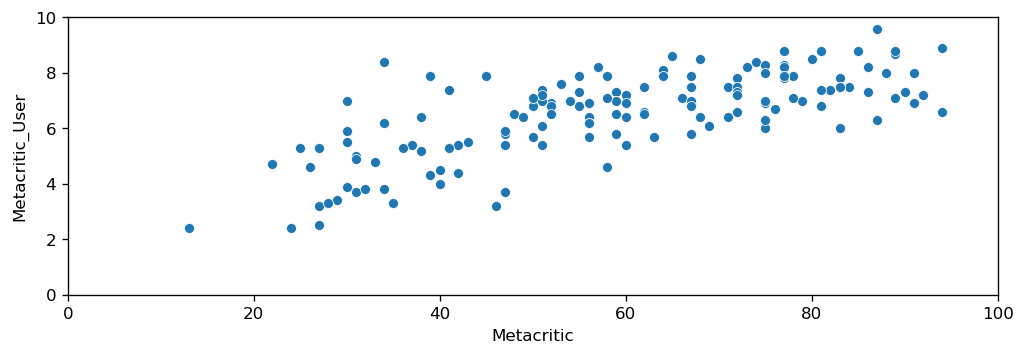

In [42]:
plt.figure(figsize=(10,3),dpi=120)
sns.scatterplot(data=allsitescore,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

In [43]:
allsitescore.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


<Axes: xlabel='IMDB', ylabel='IMDB_user_vote_count'>

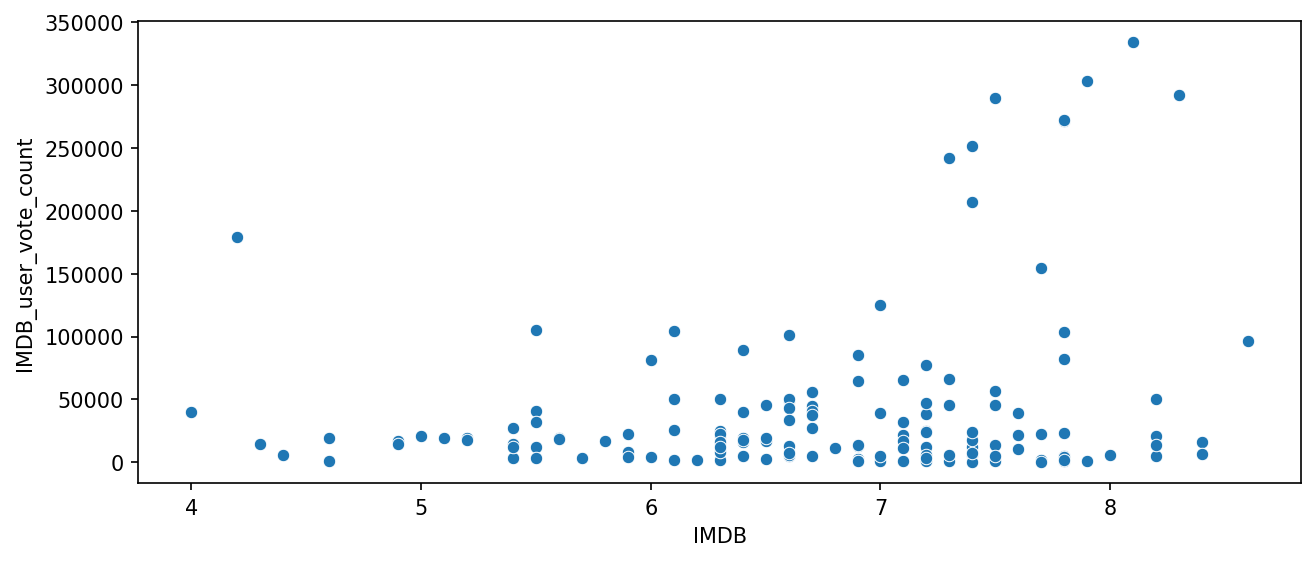

In [45]:
plt.figure(figsize=(10,4) ,dpi=150)
sns.scatterplot(data =allsitescore , x='IMDB',y='IMDB_user_vote_count')

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

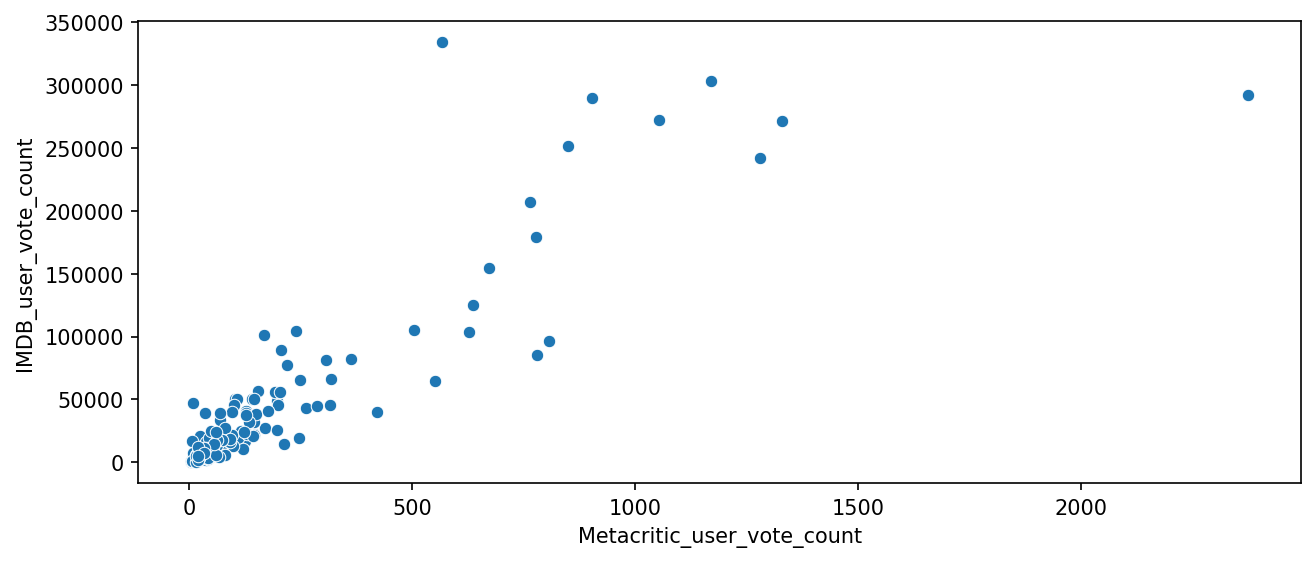

In [46]:
plt.figure(figsize=(10,4) ,dpi=150)
sns.scatterplot(data =allsitescore , x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**TASK: What movie has the highest based on IMDB , IMDB users , Metacritic_User ,Metacritic ?**

allsitescore.nlargest(1,'IMDB_user_vote_count')

In [49]:
allsitescore.nlargest(1,'IMDB')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
140,Inside Out (2015),98,90,94,8.9,8.6,807,96252,8


In [50]:
allsitescore.nlargest(1,'Metacritic_User')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
42,About Elly (2015),97,86,87,9.6,8.2,23,20659,11


In [52]:
allsitescore.nlargest(1,'Metacritic')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42


In [56]:
all_combined= pd.merge(fandago,allsitescore,on='FILM',how='inner')

In [60]:
all_combined.head()

,FILM,STARS,RATING,VOTES,year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


## Data Normalization

We need ro normalize data as each rating provider has differnt scale let us normalize them on rating and start range  .i.e. let us normalize  data betwen 0 to 5 scale 

In [61]:
all_combined['RottenTomatoes_norm']=np.round(all_combined['RottenTomatoes']/20 ,1)

In [62]:
all_combined['RottenTomatoes_User_norm']=np.round(all_combined['RottenTomatoes_User']/20 ,1)

In [63]:
all_combined['Metacritic_norm']=np.round(all_combined['Metacritic']/20 ,1)
all_combined['Metacritic_User_norm']=np.round(all_combined['Metacritic_User']/2 ,1)

In [64]:
all_combined['IMDB_norm']=np.round(all_combined['IMDB']/2 ,1)


In [72]:
all_combined.head(10)

,FILM,STARS,RATING,VOTES,year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff,RottenTomatoes_norm,RottenTomatoes_User_norm,Metacritic_norm,Metacritic_User_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,61,75,59,7.0,7.5,903,289464,-14,3.0,3.8,3.0,3.5,3.8
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,75,84,58,7.9,7.8,1054,272204,-9,3.8,4.2,2.9,4.0,3.9
7,Minions (2015),4.0,4.0,14998,2015,54,52,56,5.7,6.7,204,55895,2,2.7,2.6,2.8,2.8,3.4
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,74,86,66,7.1,7.8,1330,271107,-12,3.7,4.3,3.3,3.6,3.9
9,Into the Woods (2014),3.5,3.4,13055,2014,71,50,69,6.1,6.0,307,81679,21,3.6,2.5,3.4,3.0,3.0


In [75]:
all_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   year                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RottenTomatoes_Diff         145 non-null    int64  
 13  RottenTomatoes_norm         145 non

In [77]:
normalized_scores=all_combined[['STARS','RATING','RottenTomatoes_norm','RottenTomatoes_User_norm','Metacritic_norm','Metacritic_User_norm','IMDB_norm']]

Let us compare normaized scores for all sites 

In [78]:
def plot_check(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\Suvarna Singh\AppData\Local\Temp\ipykernel_27420\253918631.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=normalized_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
C:\Users\Suvarna Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suvarna Singh\AppData\Local\Temp\ipykernel_27420\1212322776.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


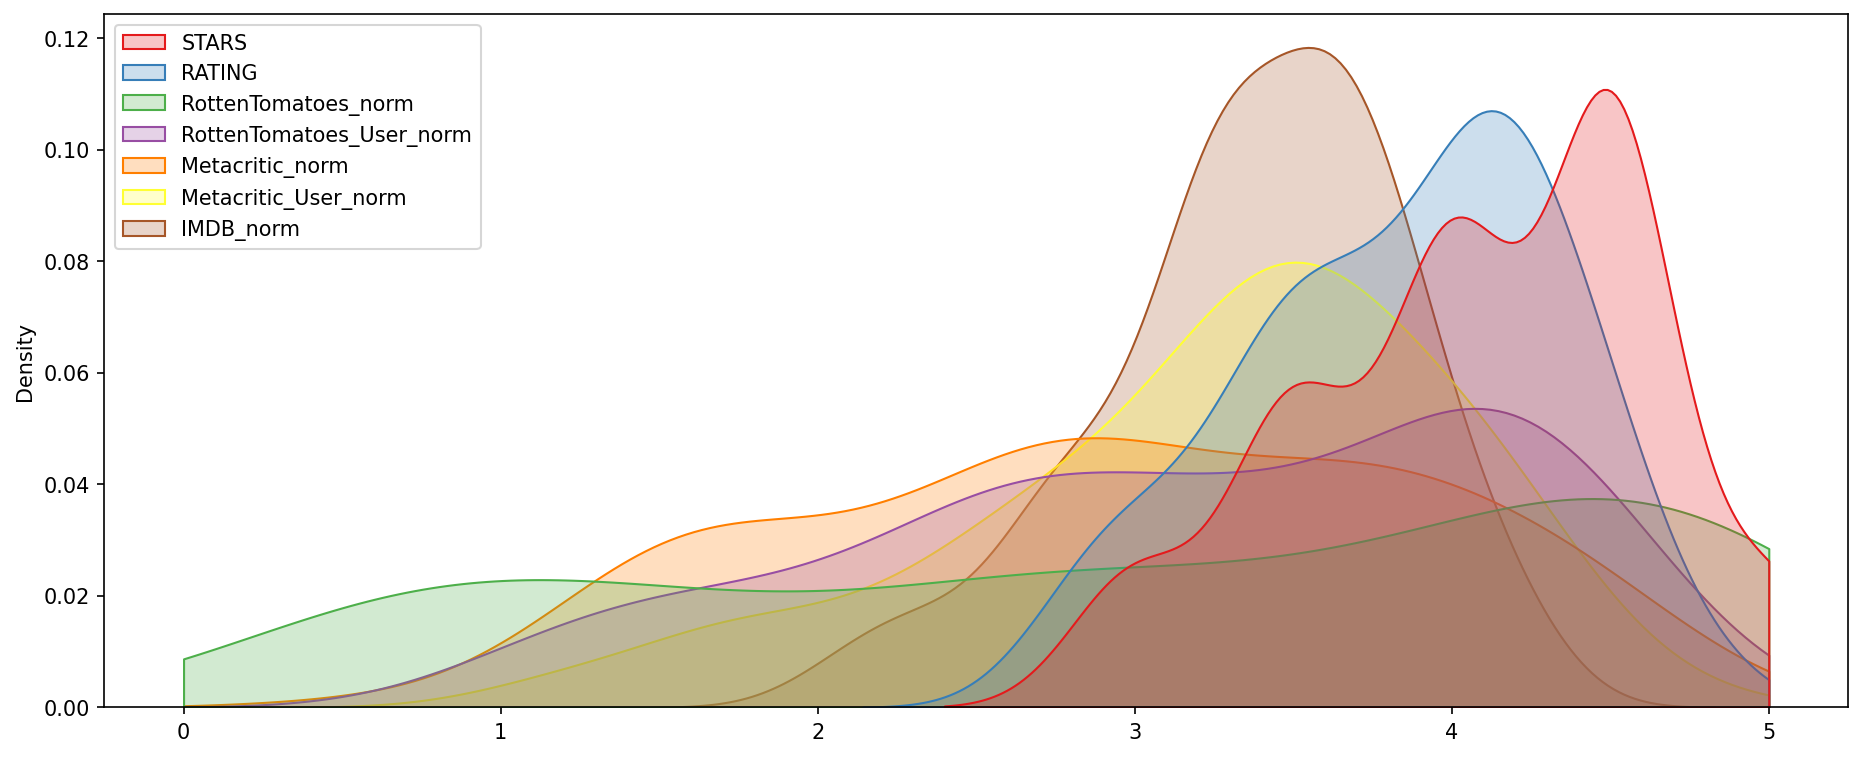

In [81]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=normalized_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
plot_check(ax, "upper left")

We could clearly see rotton tomoato has most normal distribution compared  to all site and Fandaogo has skewed /baised ditribution 

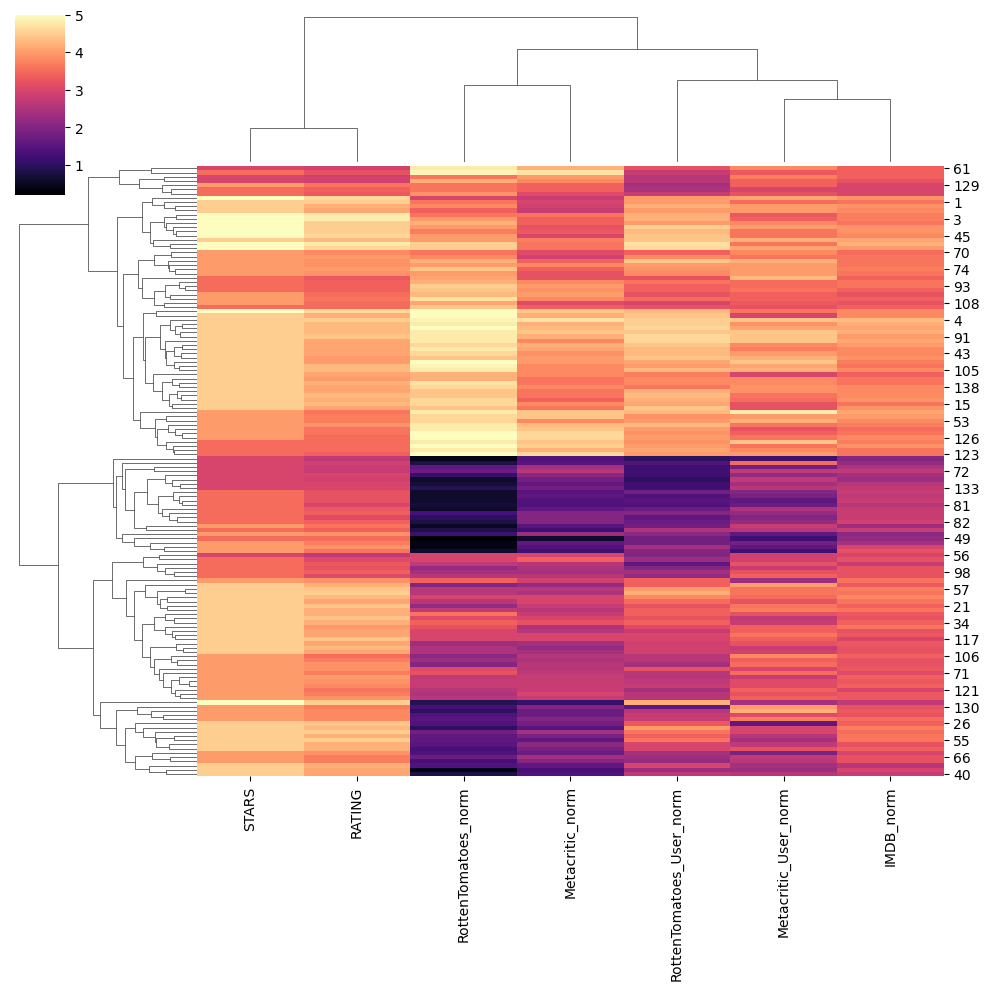

In [87]:
sns.clustermap(normalized_scores,cmap='magma' ,col_cluster='False')

We could clearly see that Fandgo is rating all moviews  higher than all other sites . All other sites are showing below rating moviews ( 1 or less ) in same spectrum  dark purpule but Fandgo is rating them much higher 

To check our analysis let us find top 10 worst movies  rated by Rooten tomoato critic and see how they are rated by other  sites .

In [90]:
finalcheck=all_combined[['FILM' ,'STARS','RATING','RottenTomatoes_norm','RottenTomatoes_User_norm','Metacritic_norm','Metacritic_User_norm','IMDB_norm']]

In [91]:
BelowRatedMovies= finalcheck.nsmallest(10,'RottenTomatoes_norm')

In [105]:
BelowRatedMovies.iloc[:,1:]

,STARS,RATING,RottenTomatoes_norm,RottenTomatoes_User_norm,Metacritic_norm,Metacritic_User_norm,IMDB_norm
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7


Looking at data we could see clearly see discripancy between rating between all other sites and Fandango to make it more clear let us plot graph and check

C:\Users\Suvarna Singh\AppData\Local\Temp\ipykernel_27420\150677737.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=BelowRatedMovies.iloc[:,1:],clip=[0,5],shade=True,palette='Set1')
C:\Users\Suvarna Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


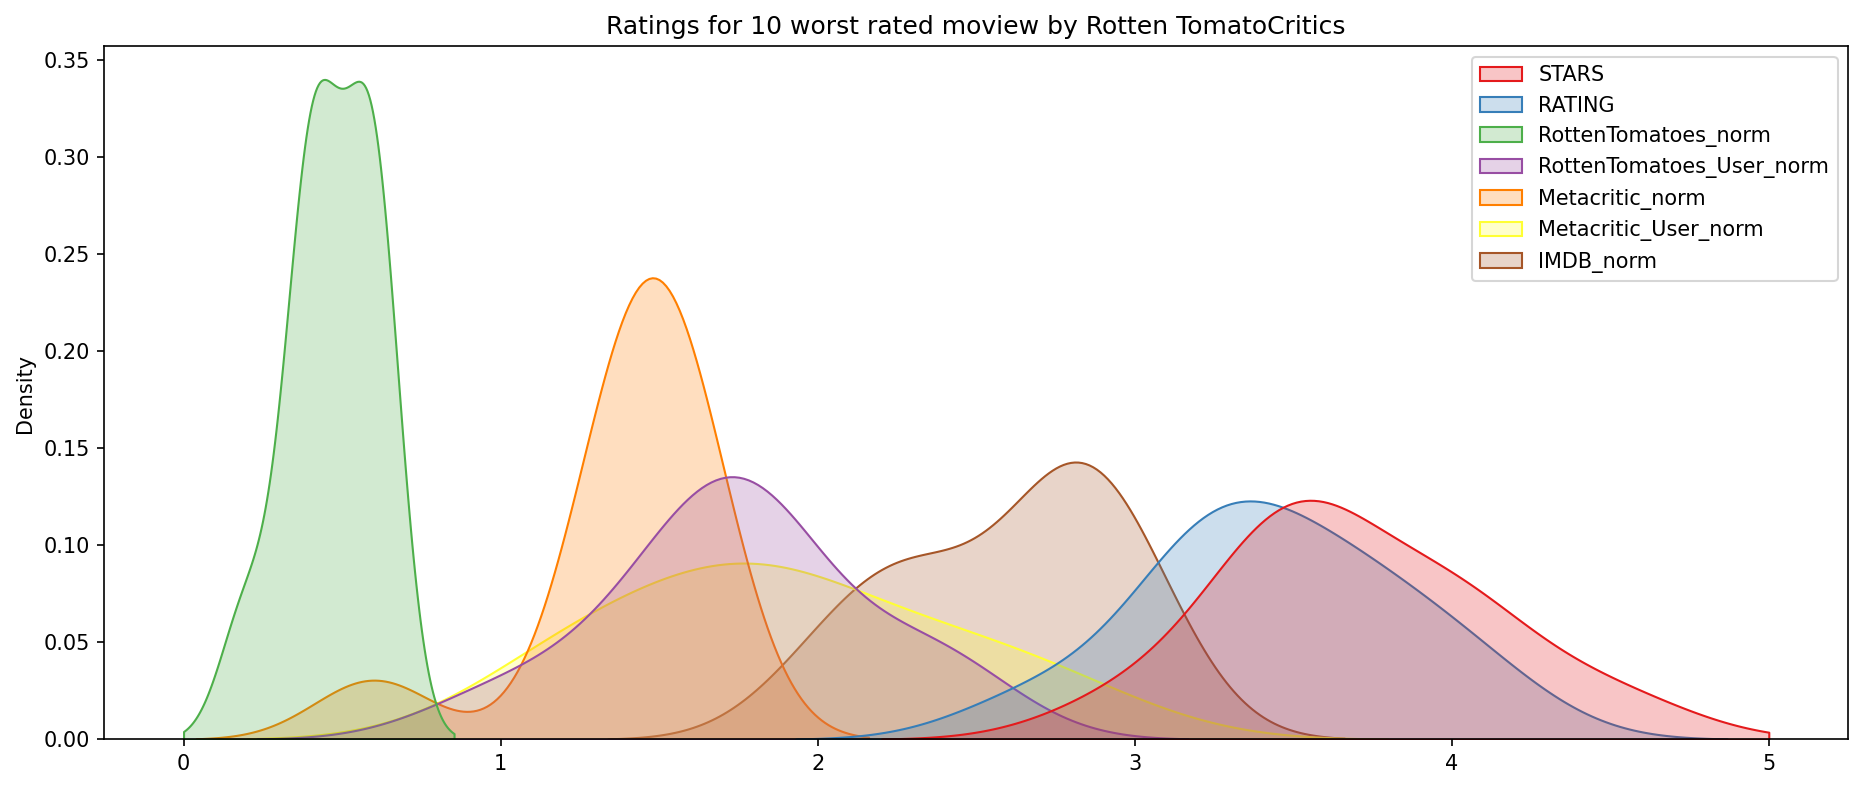

In [108]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=BelowRatedMovies.iloc[:,1:],clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for 10 worst rated moview by Rotten TomatoCritics");

We could claerly see our finding is right start rating by Fandango is  highly baised and over rated as compated to otehr sites . 